In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [30]:
data=pd.read_csv("fertilizer prediction.csv")

In [31]:
data.head()

,Crop Type,Nitrogen,Phosphorous,Potassium,Temparature,Humidity,Moisture,Soil Type,Fertilizer Name
0,Maize,37,0,0,26,52,38,Sandy,Urea
1,Sugarcane,12,36,0,29,52,45,Loamy,DAP
2,Cotton,7,30,9,34,65,62,Black,14-35-14
3,Tobacco,22,20,0,32,62,34,Red,28-28
4,Paddy,35,0,0,28,54,46,Clayey,Urea


In [32]:
data.isnull().sum()

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Crop Type        92 non-null     object
 1   Nitrogen         92 non-null     int64 
 2   Phosphorous      92 non-null     int64 
 3   Potassium        92 non-null     int64 
 4   Temparature      92 non-null     int64 
 5   Humidity         92 non-null     int64 
 6   Moisture         92 non-null     int64 
 7   Soil Type        92 non-null     object
 8   Fertilizer Name  92 non-null     object
dtypes: int64(6), object(3)
memory usage: 6.6+ KB


In [33]:
data['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [34]:
data['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [35]:
data['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20'],
      dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
croptype=LabelEncoder()
data['Crop Type']=croptype.fit_transform(data["Crop Type"])


In [38]:
data['Crop Type'].unique()

array([ 3,  8,  1,  9,  6,  0, 10,  4,  5,  7,  2])

In [39]:
soiltype=LabelEncoder()
data['Soil Type']=soiltype.fit_transform(data["Soil Type"])

In [40]:
data['Soil Type'].unique()

array([4, 2, 0, 3, 1])

In [41]:
fname=LabelEncoder()
data['Fertilizer Name']=fname.fit_transform(data["Fertilizer Name"])

In [42]:
data['Fertilizer Name'].unique()

array([5, 4, 0, 3, 1, 2])

In [43]:
crop=['Barley','Cotton','Ground Nuts','Maize','Millets','Oil seeds','Paddy','Pulses','Sugarcane','Tobacco','Wheat']

In [44]:
soil=['Black','Clayey','Loamy','Red','Sandy']

In [45]:
fertilizer=['14-35-14','17-17-17','20-20','28-28','DAP','Urea']

In [46]:
data.head()

,Crop Type,Nitrogen,Phosphorous,Potassium,Temparature,Humidity,Moisture,Soil Type,Fertilizer Name
0,3,37,0,0,26,52,38,4,5
1,8,12,36,0,29,52,45,2,4
2,1,7,30,9,34,65,62,0,0
3,9,22,20,0,32,62,34,3,3
4,6,35,0,0,28,54,46,1,5


In [47]:
data['Fertilizer Name'].unique()

array([5, 4, 0, 3, 1, 2])

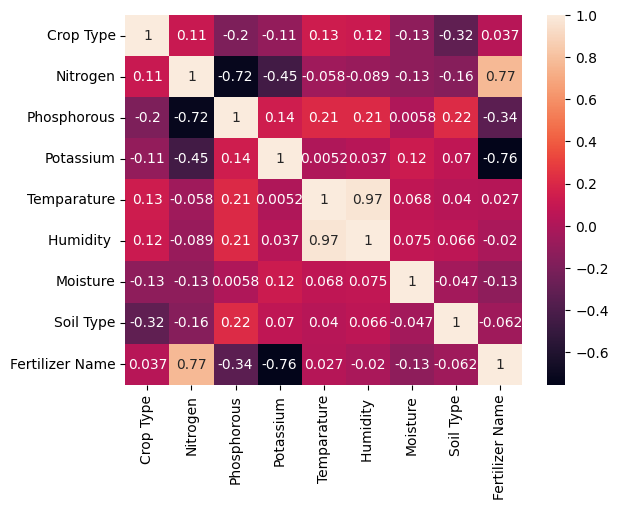

In [48]:
sns.heatmap(data=data.corr(),annot=True)
plt.show()

In [49]:
x=data.iloc[:,:-1]
y=data['Fertilizer Name']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [54]:
dtr.score(x_test,y_test)*100, dtr.score(x_train,y_train)*100

(100.0, 100.0)

In [55]:
def recommendation(C,N,P,K,T,H,M,S):
    
    for i in range(0,11):
     if (C==crop[i]):
        C=i
        
    for j in range(0,5):
        if (S==soil[j]):
            S=j
                
            
    pr=dtr.predict([[C,N,P,K,T,H,M,S]])
    fertilizer_name=fertilizer[int(pr)]
    return fertilizer_name 

In [58]:
C=str(input("Crop Name:"))
N=int(input("Nitrogen:"))
P=int(input("Phosphorus:"))
K=int(input("Potassium:"))
T= int(input("Temperature:"))
H=int(input("Humidity:"))
M=int(input("Moisture:"))
S=str(input("Soil Type:"))
predict = recommendation(C,N,P,K,T,H,M,S)
print("you Should use",predict)

Crop Name: maize
Nitrogen: 37
Phosphorus: 0
Potassium: 0
Temperature: 26
Humidity: 52
Moisture: 38
Soil Type: Sandy


C:\Users\vishal haldar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'maize'